# Image Cartoonifier

https://data-flair.training/blogs/cartoonify-image-opencv-python/

In [17]:
import cv2
import numpy as np
import easygui
import os
import matplotlib.pyplot as plt
import imageio
import sys
import tkinter as tk
from tkinter import *
from tkinter import messagebox
import PIL
from PIL import ImageTk
from PIL import Image

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\envs\dl\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-21-19a2acfcfb07>", line 9, in upload
    cartoonify(ImagePath)
  File "<ipython-input-21-19a2acfcfb07>", line 13, in cartoonify
    original_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



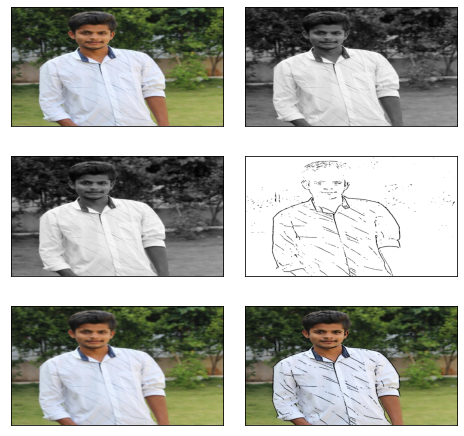

KeyboardInterrupt: 

In [21]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

def cartoonify(ImagePath):
    original_image=cv2.imread(ImagePath)
    original_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    if original_image is None:
        print("No image found")
        sys.exit()
        
    Resized1=cv2.resize(original_image,(960,540))
    
   
    grayscale_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
    Resized2=cv2.resize(grayscale_image,(960,540))
    
    smoothgrayscale_image=cv2.medianBlur(grayscale_image,5)
    Resized3=cv2.resize(smoothgrayscale_image,(960,540))
    
    getEdge=cv2.adaptiveThreshold(smoothgrayscale_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9, 9)
    Resized4=cv2.resize(getEdge,(960,540))
    
    colorImage=cv2.bilateralFilter(original_image,9,300,300)
    Resized5=cv2.resize(colorImage,(960,540))
    
    cartoonImage=cv2.bitwise_and(colorImage,colorImage,mask=getEdge)
    Resized6=cv2.resize(cartoonImage,(960,540))
    
    images=[Resized1,Resized2,Resized3,Resized4,Resized5,Resized6]
    fig,axes=plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    save1=Button(top,text="Save cartoon image",command=lambda: save(Resized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()
        
def save(Resized6, ImagePath):
    
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(Resized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()



